In [340]:
from PIL import Image, ImageDraw
from IPython.display import display
import numpy as np

In [5]:
x = Image.new("RGB", (48, 48))
x

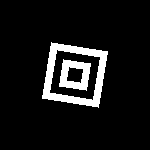

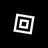

In [387]:
scale = 5
line_width = scale*2
size = scale * 30
radius = scale * 8

x = Image.new("RGB", (size, size))
d = ImageDraw.Draw(x)

center_x = size / 2
center_y = size / 2
white = (255, 255, 255)
black = (0, 0, 0)

def rect(d, center_x, center_y, radius, angle, fill):
    point1x = center_x + radius * np.cos(angle)
    point1y = center_y + radius * np.sin(angle)
    point2x = center_x + radius * np.cos(angle+np.pi/2)
    point2y = center_y + radius * np.sin(angle+np.pi/2)
    point3x = center_x + radius * np.cos(angle+np.pi)
    point3y = center_y + radius * np.sin(angle+np.pi)
    point4x = center_x + radius * np.cos(angle-np.pi/2)
    point4y = center_y + radius * np.sin(angle-np.pi/2)
    
    d.polygon([(point1x, point1y), (point2x,point2y), (point3x,point3y), (point4x,point4y)], fill=fill)

def tri(d, center_x, center_y, radius, angle, fill):
    point1x = center_x + radius * np.cos(angle)
    point1y = center_y + radius * np.sin(angle)
    point2x = center_x + radius * np.cos(angle+2*np.pi/3)
    point2y = center_y + radius * np.sin(angle+2*np.pi/3)
    point3x = center_x + radius * np.cos(angle-2*np.pi/3)
    point3y = center_y + radius * np.sin(angle-2*np.pi/3)
    
    d.polygon([(point1x, point1y), (point2x,point2y), (point3x,point3y)], fill=fill)
    
angle = np.random.uniform(-np.pi, np.pi)

rect(d, center_x, center_y, radius, angle, white)
rect(d, center_x, center_y, radius-line_width, angle, black)
rect(d, center_x, center_y, radius-line_width*2-1, angle, white)
rect(d, center_x, center_y, radius-line_width*3-1, angle, black)

# tri(d, center_x, center_y, radius, angle, white)
# tri(d, center_x, center_y, radius-line_width, angle, black)
# tri(d, center_x, center_y, radius-line_width*2-1, angle, white)
# tri(d, center_x, center_y, radius-line_width*3-1, angle, black)

display(x)

small = x.resize((48, 48))
display(small)

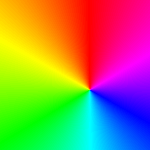

In [338]:
r = np.linspace(-1, 1, size)
coords = np.stack(np.meshgrid(r, r), axis=-1)

center = np.array([0.2, 0.2])

angles = np.arctan2(coords[:, :, 0] - center[0], coords[:, :, 1] - center[1])
magnitudes = np.linalg.norm(coords - center, axis=-1)
angles = angles
h = angles / (2*np.pi) + 0.5
s = np.ones(h.shape)
v = np.ones(h.shape)
# v = np.clip(magnitudes * 2, 0, 1)**0.5

hsv = np.stack([h, s, v], axis=-1)
hsv = hsv * 255
hsv = hsv.astype(np.uint8)

i = Image.fromarray(hsv, mode="HSV")
i = i.convert(mode="RGB")
display(i)

rainbow = np.asarray(i)

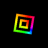

In [388]:
x.readonly = False
tri = np.asarray(x).astype(np.float32) / 255.0
rbow = np.asarray(rainbow).astype(np.float32) / 255.0
tri *= rbow
colorful = tri

colorful = colorful * 255
colorful = colorful.astype(np.uint8)

r = Image.fromarray(colorful, mode="RGB")
r.resize((48, 48))

AttributeError: 'ImageDraw' object has no attribute 'classes'